In [48]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)
import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='../images'

import misc_util,correlation_plots

import imp
imp.reload(correlation_plots)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'



In [78]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_MC_D2 no_ecuts_MC_C no_ecuts_MC_Fe no_ecuts_MC_Pb".split()
sets = "xQ2_MC_D2 xQ2_MC_C xQ2_MC_Fe xQ2_MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

dfs_mixed = {a.replace("xQ2_","") : root_pandas.read_root("../eg2/python/mixed_%s.root"%a)  for a in sets}

In [79]:
print(dfs_mixed.keys())
for key in dfs_mixed.keys():
    print(key,"h2_deltaZ" in dfs_mixed[key].columns)
#dfs_data = {a : root_pandas.read_root("/home/seba/CreatePairTuples/Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C C D_Fe Fe Pb D_Pb".split()}


#dfs_trigger = {a : root_pandas.read_root("/home/seba/CreatePairTuples/Pairs_%s.root" %a.replace("D_",""),a+"_trigger") for a in "D_C C D_Fe Fe Pb D_Pb".split()}



dict_keys(['MC_D2', 'MC_C', 'MC_Fe', 'MC_Pb', 'D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb'])
MC_D2 True
MC_C True
MC_Fe True
MC_Pb True
D_C True
C True
D_Fe True
Fe True
Pb True
D_Pb True


In [80]:
#now load MC
#dfs_data.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a) for a in "Pb D C Fe".split()})




In [81]:
#dfs_trigger.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a + "_trigger") for a in "Pb D C Fe".split()})



In [82]:
for dct in dfs_mixed,:
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])

In [83]:
for dct in dfs_mixed,:
    for mixtag in ['']:
        dct[mixtag+'D'] = pd.concat([dct[mixtag+'D_'+a] for a in 'C Fe Pb'.split()])


In [84]:

import R2h_module

# for key in list(dfs_data.keys()):
#     if '_2pi' in key or '_pi_p' in key:
#         continue
#     df = dfs_data[key]
#     print(df.columns)
#     if 'h2_deltaZ' not in df.columns:
#         df.eval('h2_deltaZ = 0', inplace=True)
#     if 'h1_deltaZ' not in df.columns:
#         df.eval('h1_deltaZ = 0', inplace=True)
#     if 'TargType' not in df.columns:
#         df.eval('TargType = 1', inplace=True)
#     df.eval('inelasticity = nu/5.014', inplace=True)
#     df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
#     df.eval('pi='+str(np.pi),inplace=True) #not sure why eval doesn't know what pi is.  
#     df.eval('diff_phi_cm = 2*pi*(diff_phi_cm<-pi)-2*pi*(diff_phi_cm>pi)')
#     df.eval('h1_e = h1_z*nu', inplace=True)
#     df.eval('h2_e = h2_z*nu', inplace=True)
#     df.eval('h2_mass = 0.13957*(abs(h2_pid)==211)+.93827208816*(abs(h2_pid)==2212)', inplace=True)
#     df.eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
#     df.eval('h2_p = sqrt(h2_e*h2_e-h2_mass*h2_mass)', inplace=True)
#     df.eval('diff_rap_cm = drap',inplace=True)
#     print(df.columns)
#     dfs_data[key+"_2pi"] = R2h_module.applyCuts(R2h_module.applyCutsPair(df,h2Proton=False, nomCuts=True), nomCuts=True)
#     dfs_data[key+"_pi_p"] = R2h_module.applyCuts(R2h_module.applyCutsPair(df,h2Proton=True, nomCuts=True), nomCuts=True)
for key in list(dfs_mixed.keys()): 
    if '_2pi' in key or '_pi_p' in key:
        continue
    #if 'MC_' in key:
    #    continue
    print('key is ',key)
    print(dfs_mixed[key].columns)
    for col in "h1_FidCutPiPlus h2_FidCutPiPlus SampFracEl25".split():
        if col not in dfs_mixed[key].columns:
            dfs_mixed[key].eval(f"{col}=1", inplace=True)
    #for col in "h1_deltaZ h2_deltaZ".split():
    #    if col not in dfs_mixed[key].columns:
    #        dfs_mixed[key].eval(f"{col}=0", inplace=True)
    #for col in "h1_Nphe h2_Nphe".split():
    #    if col not in dfs_mixed[key].columns:
    #        dfs_mixed[key].eval(f"{col}=12", inplace=True)
    dfs_mixed[key+"_2pi"] = R2h_module.applyCuts(R2h_module.applyCutsPair(dfs_mixed[key],h2Proton=False, nomCuts=True), nomCuts=True)
    #dfs_mixed[key+"_pi_p"] = R2h_module.applyCuts(R2h_module.applyCutsPair(dfs_mixed[key],h2Proton=True, nomCuts=True), nomCuts=True)
#for key in list(dfs_trigger.keys()):
#    if '_2pi' in key or '_pi_p' in key:
#        continue
#    dfs_trigger[key] = R2h_module.applyCuts(dfs_trigger[key])

key is  MC_D2
Index(['E', 'mixevt_E', 'e_p', 'mixevt_e_p', 'e_th', 'mixevt_e_th', 'e_ph',
       'mixevt_e_ph', 'h1_pid', 'h2_pid', 'h1_xf', 'h2_xf', 'h1_xf_default',
       'h2_xf_default', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_rap',
       'h2_rap', 'h1_cm_rap', 'h2_cm_rap', 'Q2', 'mixevt_Q2', 'x', 'mixevt_x',
       'nu', 'mixevt_nu', 'W', 'mixevt_W', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th',
       'TargType', 'missing_mass', 'h1_ph', 'h2_ph', 'h1_th', 'h2_th', 'h1_p',
       'h2_p', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector',
       'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_Chi2CC', 'h2_Chi2CC',
       'h1_StatCC', 'h2_StatCC', 'SampFracEl25', 'SampFracEl20', 'z', 'e_px',
       'mixevt_e_px', 'e_py', 'mixevt_e_py', 'e_pz', 'mixevt_e_pz', 'y',
       'mixevt_y', 'h1_px', 'h2_px', 'h1_py', 'h2_py', 'h1_pz', 'h2_pz',
       'q_th', 'mixevt_q_th', 'mixevt_nskipped', 'diff_phi_cm', 'diff_phi_lab',
       'diff_rap_cm', 'mx_eh1x', 'mx_eh2x', 'mx_eh1h2x', 'pair_mass',


1.0< Q2 <4.0 3078859  (100.00  %)
2.2 < nu < 4.2 3037189  (98.65  %)
secondary hadrons are pions 2190648  (72.13  %)
(h1_z+h2_z)<1.0 1899644  (86.72  %)
leading hadrons are pions 1899644  (100.00  %)
0.2<h2_p<5.0 1899644  (100.00  %)
0.2<h1_p<5.0 1899644  (100.00  %)
10<h2_th<90 1892896  (99.64  %)
Theta/P fiducial region selected for secondary hadron 1892896  (100.00  %)
10< h1_th<90 1892896  (100.00  %)
Theta/P fiducial region selected for trigger hadron 1892896  (100.00  %)
Nom cuts for the pair applied (pi pi) 893278  (47.19  %)
Entries before cut  893278
Q2>1.0 and Q2<4.0 893278  (100.00  %)
0.2<h1_p<5.0  893278  (100.00  %)
inelasticity < 0.85 893278  (100.00  %)
h1_pid = pions (trigger) 893278  (100.00  %)
2.2 < nu <4.2 893278  (100.00  %)
10< h1_th<90 893278  (100.00  %)
Theta/P fiducial region selected for trigger 893278  (100.00  %)
Nom cuts for the trigger applied 893278  (100.00  %)
key is  C
Index(['E', 'mixevt_E', 'e_p', 'mixevt_e_p', 'e_th', 'mixevt_e_th', 'e_ph',
      

1.0< Q2 <4.0 859360  (100.00  %)
2.2 < nu < 4.2 846060  (98.45  %)
secondary hadrons are pions 368028  (43.50  %)
(h1_z+h2_z)<1.0 334055  (90.77  %)
leading hadrons are pions 334055  (100.00  %)
0.2<h2_p<5.0 334055  (100.00  %)
0.2<h1_p<5.0 334055  (100.00  %)
10<h2_th<90 329314  (98.58  %)
Theta/P fiducial region selected for secondary hadron 329314  (100.00  %)
10< h1_th<90 329246  (99.98  %)
Theta/P fiducial region selected for trigger hadron 329246  (100.00  %)
Nom cuts for the pair applied (pi pi) 153055  (46.49  %)
Entries before cut  153055
Q2>1.0 and Q2<4.0 153055  (100.00  %)
0.2<h1_p<5.0  153055  (100.00  %)
inelasticity < 0.85 153055  (100.00  %)
h1_pid = pions (trigger) 153055  (100.00  %)
2.2 < nu <4.2 153055  (100.00  %)
10< h1_th<90 153055  (100.00  %)
Theta/P fiducial region selected for trigger 153055  (100.00  %)
Nom cuts for the trigger applied 153055  (100.00  %)
key is  D_Pb
Index(['E', 'mixevt_E', 'e_p', 'mixevt_e_p', 'e_th', 'mixevt_e_th', 'e_ph',
       'mixevt_

In [89]:
print(dfs_mixed.keys())
dfs_mixed['MC_D_2pi']= dfs_mixed['MC_D2_2pi']

dict_keys(['MC_D2', 'MC_C', 'MC_Fe', 'MC_Pb', 'D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'D', 'MC_D2_2pi', 'MC_C_2pi', 'MC_Fe_2pi', 'MC_Pb_2pi', 'D_C_2pi', 'C_2pi', 'D_Fe_2pi', 'Fe_2pi', 'Pb_2pi', 'D_Pb_2pi', 'D_2pi'])


In [85]:
def mix_summary_plots(prefix='',suffix='_2pi', queries=['h1_z == h1_z'], labels=None,useInFit=True, xvar='abs(diff_phi_lab)',
                      bins=10,xmin=0, xmax=np.pi,xlbl='$\\Delta\\phi_{\\mathrm{lab}}$',
                      suptitle=None,fitParams=None, showBand = True):
    rows = len(queries)
    # two columns: first is the num and denom (mixed A and mixed D)
    # second is M_A/M_D
    fig,axs = plt.subplots(rows,2, sharey='col',sharex='all', figsize=(14,3.5*rows))
    if rows == 1:
        axs = [axs]
    fig.subplots_adjust(hspace=0)
    #if suptitle:
    #    fig.suptitle(suptitle)
    targets = 'D C Fe Pb'.split()
    nuclei = 'C Fe Pb'.split()
    colors = {'D':'k', 'C':'tab:blue', 'Fe':'tab:orange','Pb':'tab:green'}
    
    # calculate the  weighted mean uncertainty
    sumNum = 0
    sumNumCos2dphi = 0
    sumDenom = 0
    sumDenomCos2dphi = 0
    
    for j in range(len(queries)):
        
        ym = {}
        dym = {}
        for a in targets + 'D_C D_Fe D_Pb'.split():
            df = dfs_mixed[prefix+a+suffix].query(queries[j])
            ym[a],x = np.histogram(df.eval(xvar),bins=bins,range=(xmin,xmax))
            x = np.add(x[:-1],x[1:])/2
            denom = np.mean(ym[a])
            dym[a] = np.sqrt(ym[a])/denom
            ym[a] = ym[a]/denom
            del df
        
        
        
        plt.sca(axs[j][0])
        plt.gca().axhline(1,color='0.7',linestyle='--')
        
        plt.gca().set_ylabel('$M$')
        for a in targets:
            plt.errorbar(x,ym[a],dym[a],linestyle='',color=colors[a],marker='o',markersize=5,label=a)
            
        plt.sca(axs[j][1])
        plt.gca().set_ylabel('$M_A/M_D$')
        plt.gca().axhline(1,color='0.7',linestyle='--')
        for a in nuclei:
            yr = ym[a]/ym['D_' + a]
            dyr = ym[a]/ym['D_' + a]*np.hypot(dym['D_' + a]/ym['D_' + a], dym[a]/ym[a])
            plt.errorbar(x,yr,dyr,linestyle='',color=colors[a],marker='o',markersize=5,label=a)
            if useInFit is True or useInFit[j] == True:
                sumNum += sum((yr-1)**2/dyr**2)
                sumNumCos2dphi += sum(np.cos(2*x)*(yr-1)**2/dyr**2)
                sumDenom += sum(1/dyr**2)
                sumDenomCos2dphi += sum(np.cos(2*x)**2/dyr**2)
        if not labels is None:
            axs[j][0].text(0.5,0.9, labels[j],transform = axs[j][0].transAxes,fontsize='large')
            axs[j][1].text(0.5,0.9, labels[j],transform = axs[j][1].transAxes,fontsize='large')
        axs[j][0].set_xlim(xmin,xmax)
        axs[j][1].set_xlim(xmin,xmax)
    for i in range(2):
        axs[-1][i].set_xlabel(xlbl)
    
    axs[0][0].legend()
    C0,C2 = 0,0
    if showBand:
        if fitParams == None:
            #C0 = sumNum/sumDenom
            #C2 = sumNumCos2dphi/sumDenom#Cos2dphi
            C0 = np.sqrt(sumNum/sumDenom)
            C2 = abs(sumNumCos2dphi)/sumNumCos2dphi*np.sqrt(abs(sumNumCos2dphi)/sumDenomCos2dphi)
        else :
            C0,C2 = fitParams
        print("estimated uncertainty=",C0,"+",C2,"*cos(2*dphi)")
        if 'abs(diff_phi' in xvar:
            x1 = np.linspace(0,np.pi, 100)
            #y1 = 1+np.sqrt(C0+np.cos(2*x1)*C2)
            y1 = 1+(C0+np.cos(2*x1)*C2)
            x2 = np.linspace(np.pi,0, 100)
            #y2 = 1-np.sqrt(C0+np.cos(2*x2)*C2)
            y2 = 1-(C0+np.cos(2*x2)*C2)
            for j in range(len(queries)):
                axs[j][1].fill(list(x1)+list(x2), list(y1)+list(y2),alpha=0.3,color='0.5')
        
    plt.tight_layout()
    #plt.subplots_adjust(top=0.85)
    
    return C0,C2

In [86]:
split_by_trigger=dict(queries=['h1_pid==211','h1_pid==-211'], labels=['$\\pi^+\\pi$','$\\pi^-\\pi$'])
partitions = [.1,.2,.3,.5]
slices = [(partitions[i],partitions[i+1]) for i in range(len(partitions)-1)]
split_by_z=dict(queries=['h2_z==h2_z']+\
                      [f'h2_z>{mn} and h2_z<{mx}' for mn,mx in slices], 
                      labels=['all $0.1<z_2<0.5$'] + [f'${mn}< z_2<{mx}$' for mn,mx in slices], useInFit=[False]+[True]*len(slices))

partitions = [5, 30, 55, 70, 100]
slices = [(partitions[i],partitions[i+1]) for i in range(len(partitions)-1)]
split_by_th2=dict(queries=['h2_z==h2_z']+\
                      [f'h2_th*180/3.141592>{mn} and h2_th*180/3.141592<{mx}' for mn,mx in slices], 
                      labels=['all $\\theta_{h2}$'] + [f'${mn}< \\theta_{{h2}}<{mx}$' for mn,mx in slices], useInFit=[False]+[True]*len(slices))

#identifier for datasets
normal_mixing = dict(prefix='',suffix='_2pi')
xQ2_mixing = dict(prefix='',suffix='_2pi')
nocuts_mixing = dict(prefix='no_ecuts_',suffix='_2pi')

cm = dict(xvar='abs(diff_phi_cm)',bins=10,xmin=0, xmax=np.pi,
                  xlbl='$|\\Delta\\phi|$ [rad]')
lab = dict(xvar='abs(diff_phi_lab)',bins=20,xmin=0, xmax=np.pi,
                  xlbl='|$\\Delta\\phi_{\\mathrm{lab}}|$ [rad]')

estimated uncertainty= 0.016067735599122467 + 0.005189581567282329 *cos(2*dphi)
estimated uncertainty= 0.016067735599122467 + 0 *cos(2*dphi)


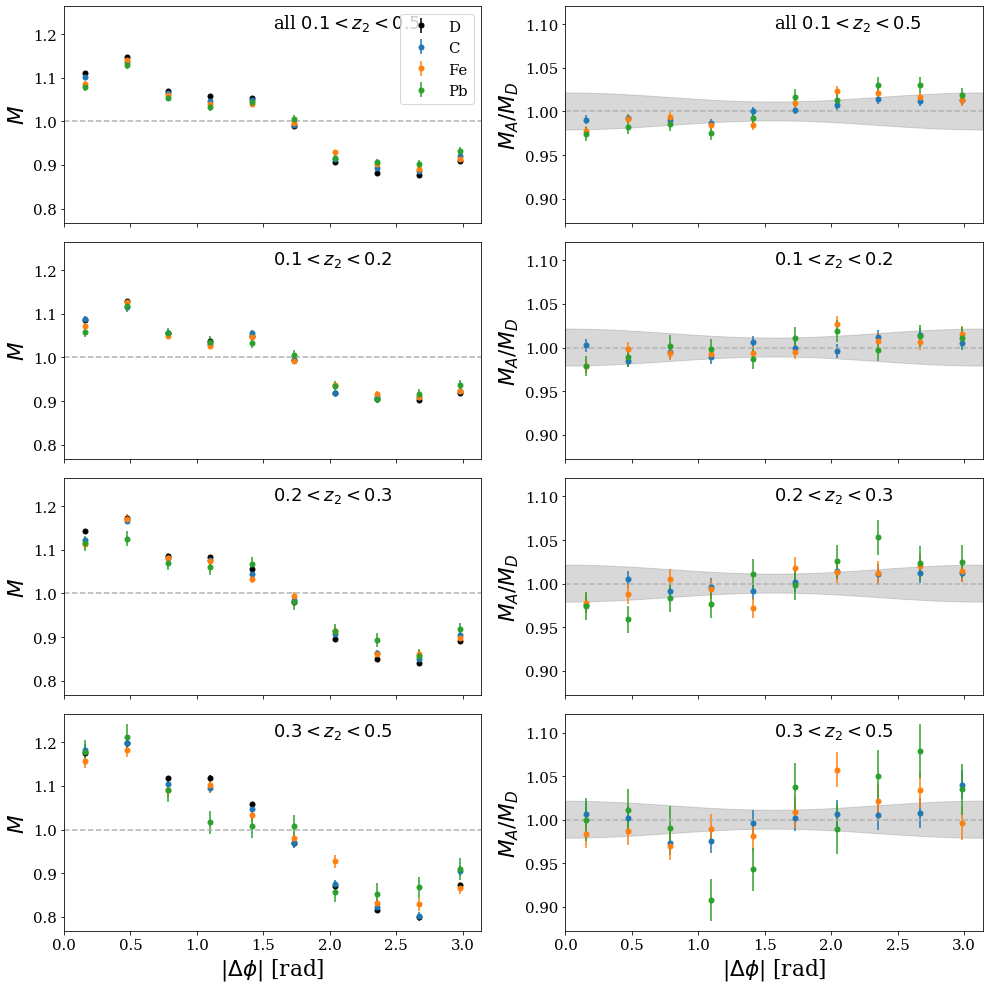

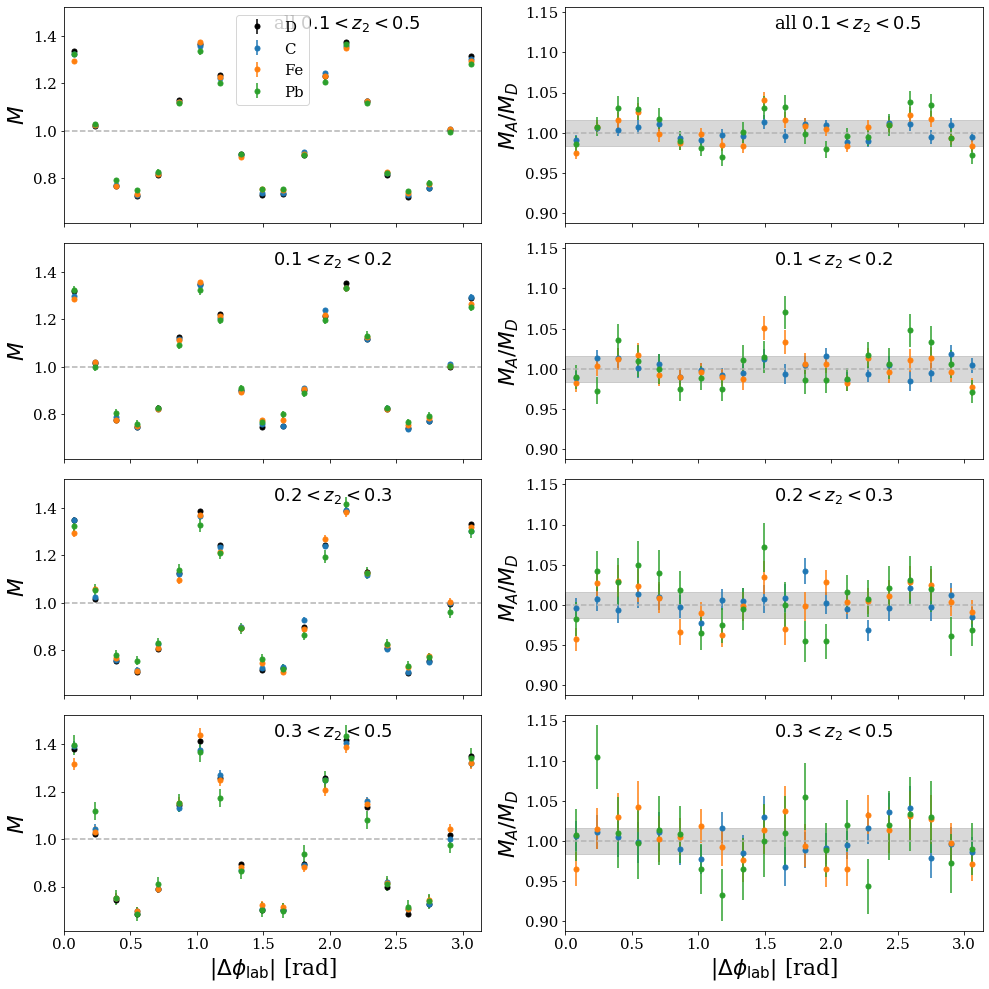

In [70]:


#mix_summary_plots(**normal_mixing, **split_by_z, **lab, suptitle='$x$, $\\Delta\\Phi_q$ mixing cuts, $\\Delta\\phi_{\\mathrm{lab}}$')
#plt.savefig("../images/mixtest_normal_z2_lab.png",bbox_inches='tight')
#mix_summary_plots(**normal_mixing, **split_by_z, **cm, suptitle='$x$,$\\Delta\\Phi_q$ mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$')
#plt.savefig("../images/mixtest_normal_z2_cm.png",bbox_inches='tight')
C0,C1 = mix_summary_plots(**xQ2_mixing, **split_by_z, **cm, suptitle='$x$, $Q^2$ mixing cuts, $|\\Delta\\phi|$ [rad]')
plt.savefig("images/mixtest_xQ2_z2_cm.png",bbox_inches='tight')
mix_summary_plots(**xQ2_mixing, **split_by_z, **lab, suptitle='$x$, $Q^2$ mixing cuts, $\\Delta\\phi_{\\mathrm{lab}}$ [rad]',fitParams=(C0,0))
plt.savefig("images/mixtest_xQ2_z2_lab.png",bbox_inches='tight')
#mix_summary_plots(**nocuts_mixing, **split_by_z, **lab, suptitle='no mixing cuts, $\\Delta\\phi_{\\mathrm{lab}}$')
#plt.savefig("../images/mixtest_no_ecuts_z2_lab.png",bbox_inches='tight')
#mix_summary_plots(**nocuts_mixing, **split_by_z, **cm, suptitle='no mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$')
#plt.savefig("../images/mixtest_no_ecuts_z2_cm.png",bbox_inches='tight')

In [71]:


#mix_summary_plots(**normal_mixing, **split_by_th2, **lab, suptitle='$x$, $\\Delta\\Phi_q$ mixing cuts, $\\Delta\\phi_{\\mathrm{lab}}$')
#plt.savefig("../images/mixtest_normal_theta_h2_lab.png",bbox_inches='tight')
#mix_summary_plots(**normal_mixing, **split_by_th2, **cm, suptitle='$x$,$\\Delta\\Phi_q$ mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$')
#plt.savefig("../images/mixtest_normal_theta_h2_cm.png",bbox_inches='tight')
#mix_summary_plots(**xQ2_mixing, **split_by_th2, **cm, suptitle='$x$, $Q^2$ mixing cuts, $|\\Delta\\phi|$ [rad]',fitParams=(C0,C1))
#plt.savefig("images/mixtest_xQ2_theta_h2_cm.png",bbox_inches='tight')
#mix_summary_plots(**xQ2_mixing, **split_by_th2, **lab, suptitle='$x$, $Q^2$ mixing cuts, $|\\Delta\\phi_{\\mathrm{lab}}|$ [rad]',fitParams=(C0,0))
#plt.savefig("images/mixtest_xQ2_theta_h2_lab.png",bbox_inches='tight')
#mix_summary_plots(**nocuts_mixing, **split_by_th2, **lab, suptitle='no mixing cuts, $\\Delta\\phi_{\\mathrm{lab}}$')
#plt.savefig("../images/mixtest_no_ecuts_theta_h2_lab.png",bbox_inches='tight')
#mix_summary_plots(**nocuts_mixing, **split_by_th2, **cm, suptitle='no mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$')
#plt.savefig("../images/mixtest_no_ecuts_theta_h2_cm.png",bbox_inches='tight')

estimated uncertainty= 0.016067735599122467 + 0.005189581567282329 *cos(2*dphi)
estimated uncertainty= 0.016067735599122467 + 0 *cos(2*dphi)


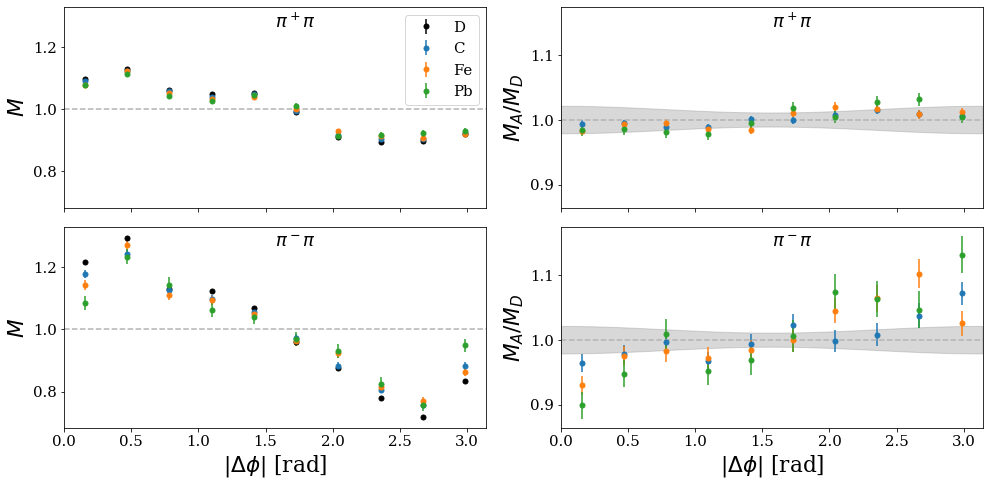

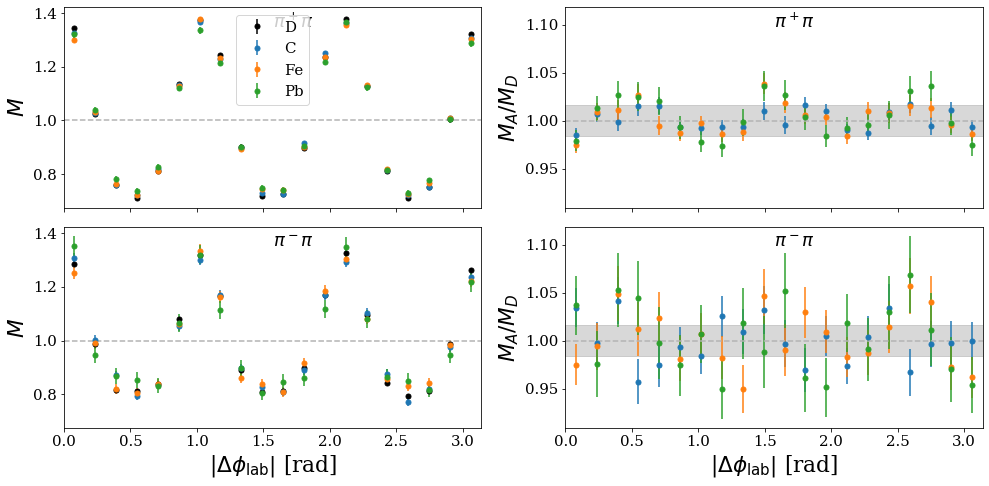

In [72]:
#mix_summary_plots(**normal_mixing, **split_by_trigger, **lab, suptitle='$x$, $\\Delta\\Phi_q$ mixing cuts, $\\Delta\\phi_{\\mathrm{lab}}$')
#plt.savefig("../images/mixtest_normal_trigger_lab.png",bbox_inches='tight')
#mix_summary_plots(**normal_mixing, **split_by_trigger, **cm, suptitle='$x$,$\\Delta\\Phi_q$ mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$')
#plt.savefig("../images/mixtest_normal_trigger_cm.png",bbox_inches='tight')
mix_summary_plots(**xQ2_mixing, **split_by_trigger, **cm, suptitle='$x$, $Q^2$ mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$',fitParams=(C0,C1))
plt.savefig("images/mixtest_xQ2_trigger_cm.png",bbox_inches='tight')
mix_summary_plots(**xQ2_mixing, **split_by_trigger, **lab, suptitle='$x$, $Q^2$ mixing cuts, $\\Delta\\phi_{\\mathrm{lab}}$',fitParams=(C0,0))
plt.savefig("images/mixtest_xQ2_trigger_lab.png",bbox_inches='tight')
#mix_summary_plots(**nocuts_mixing, **split_by_trigger, **lab, suptitle='no mixing cuts, $\\Delta\\phi_{\\mathrm{lab}}$')
#plt.savefig("../images/mixtest_no_ecuts_trigger_lab.png",bbox_inches='tight')
#mix_summary_plots(**nocuts_mixing, **split_by_trigger, **cm, suptitle='no mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$')
#plt.savefig("../images/mixtest_no_ecuts_trigger_cm.png",bbox_inches='tight')

KeyError: 'MC_D_C_2pi'

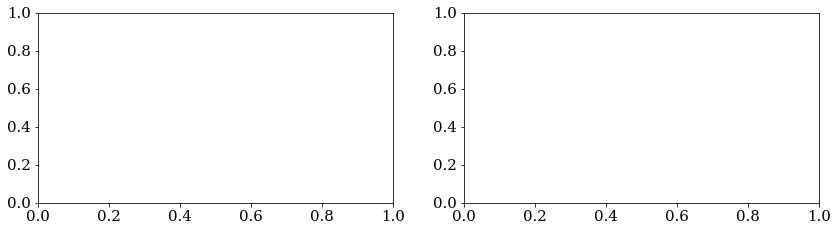

In [90]:
#mix_summary_plots(prefix='MC_',suffix='_2pi', **cm, suptitle='$x$, $\\Delta\\Phi_q$ mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$:   MC')

c0mc,c2mc = mix_summary_plots(prefix='MC_',suffix='_2pi', **cm, suptitle='$x$, $Q^2$ mixing cuts, $|\\Delta\\phi|$ [rad]:   MC')
plt.savefig("images/mixtest_xQ2_mc_combined_cm.png",bbox_inches='tight')
mix_summary_plots(prefix='MC_',suffix='_2pi', **lab,
                  suptitle='$x$, $Q^2$ mixing cuts, $|\\Delta\\phi_{\\mathrm{lab}}| [rad]$:   MC', fitParams=(c0mc,0))
plt.savefig("images/mixtest_xQ2_mc_combined_lab.png",bbox_inches='tight')



#mix_summary_plots(prefix='no_ecuts_MC_',suffix='_2pi', **cm, suptitle='no mixing cuts, $\\Delta\\phi_{\\mathrm{cm}}$:   MC')



In [26]:
plt.hist2d(dfs_mixed['xQ2_C'].Q2,dfs_mixed['xQ2_C'].mixevt_Q2,bins=100)
plt.show()
plt.hist2d(dfs_mixed['xQ2_C'].x,dfs_mixed['xQ2_C'].mixevt_x,bins=100)
plt.show()
plt.hist2d(dfs_mixed['xQ2_C'].e_ph,dfs_mixed['xQ2_C'].mixevt_e_ph,bins=100)
plt.show()

KeyError: 'xQ2_C'

In [ ]:
df = dfs_mixed['no_ecuts_C']
plt.hist2d(df.x,df.mixevt_x)

In [ ]:
max(dfs_mixed['xQ2_C'].Q2-dfs_mixed['xQ2_C'].mixevt_Q2)

In [ ]:
max(dfs_mixed['xQ2_C'].x-dfs_mixed['xQ2_C'].mixevt_x)

In [ ]:
max(dfs_mixed['C'].x-dfs_mixed['C'].mixevt_x)

In [ ]:
plt.hist((dfs_mixed['C'].e_ph-dfs_mixed['C'].mixevt_e_ph)*np.sin(dfs_mixed['C'].mixevt_e_th)**180/np.pi,range=(-9,9))

In [ ]:
#now for MC
for k in list(dfs_mixed.keys()):
    if 'D2' in k:
        dfs_mixed[k.replace('D2','D')]=dfs_mixed[k]
        dfs_mixed[k.replace('D2','D_C')]=dfs_mixed[k]
        dfs_mixed[k.replace('D2','D_Fe')]=dfs_mixed[k]
        dfs_mixed[k.replace('D2','D_Pb')]=dfs_mixed[k]